In [6]:
# from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt 


In [10]:
df = pd.read_csv("boston.csv")
# df.head()

In [11]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"] 

In [13]:
# df.head()


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [15]:
X_train.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.186428,0.380187,-0.046672,0.413208,-0.186874,0.332289,-0.353662,0.605986,0.561413,0.258738,-0.301542,0.427509
ZN,-0.186428,1.000000,-0.524241,-0.062836,-0.516702,0.334218,-0.564014,0.645057,-0.308804,-0.323577,-0.419223,0.157371,-0.428446
INDUS,0.380187,-0.524241,1.000000,0.043967,0.748726,-0.389081,0.609572,-0.685618,0.589179,0.729635,0.396600,-0.334796,0.584833
CHAS,-0.046672,-0.062836,0.043967,1.000000,0.019180,0.109878,0.057431,-0.079618,0.037804,-0.010479,-0.053463,0.074647,-0.049209
NOX,0.413208,-0.516702,0.748726,0.019180,1.000000,-0.279202,0.736087,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.567100
RM,-0.186874,0.334218,-0.389081,0.109878,-0.279202,1.000000,-0.238473,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.627576
AGE,0.332289,-0.564014,0.609572,0.057431,0.736087,-0.238473,1.000000,-0.754797,0.440954,0.500858,0.243739,-0.251282,0.606192
DIS,-0.353662,0.645057,-0.685618,-0.079618,-0.765753,0.183857,-0.754797,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.499146
RAD,0.605986,-0.308804,0.589179,0.037804,0.627188,-0.179242,0.440954,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.430470
TAX,0.561413,-0.323577,0.729635,-0.010479,0.683445,-0.275242,0.500858,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.506417


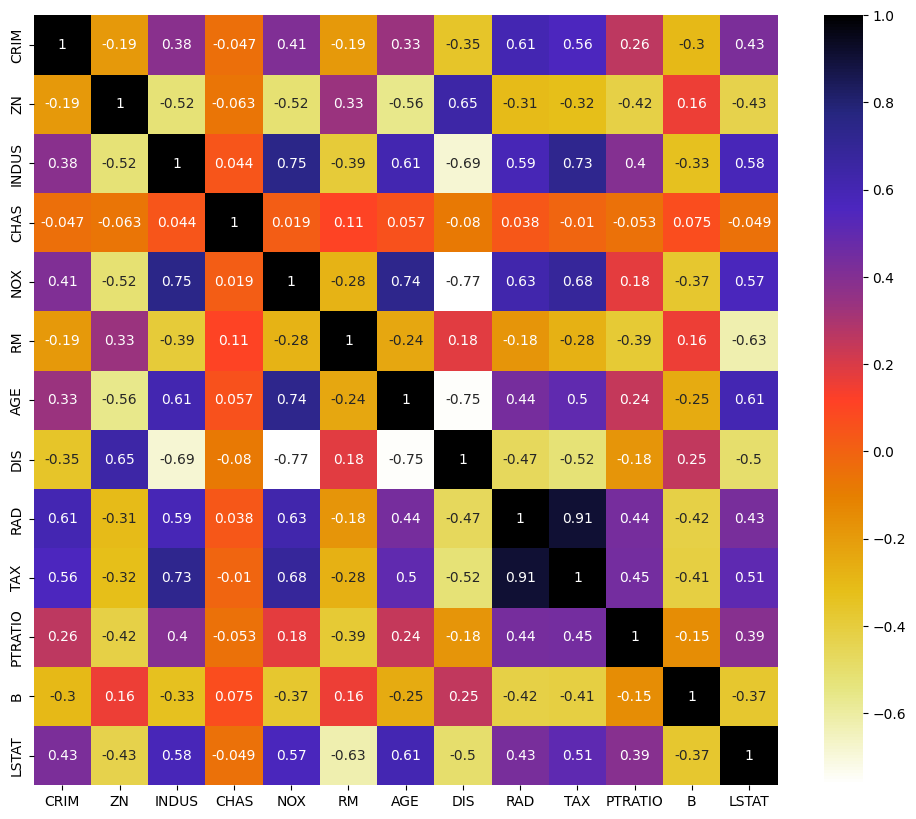

In [16]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [31]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # print("sksssss",i, j,corr_matrix.iloc[i, j] )
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [33]:
corr_features


{'AGE', 'DIS', 'NOX', 'TAX'}

In [34]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)


,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24,20.2,366.15,9.53
219,0.11425,0.0,NaN,1.0,6.373,5,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3,18.7,396.90,NaN
428,7.36711,0.0,18.10,0.0,6.193,24,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4,18.4,396.90,4.54
